In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e6/sample_submission.csv
/kaggle/input/playground-series-s5e6/train.csv
/kaggle/input/playground-series-s5e6/test.csv


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
train=pd.read_csv('/kaggle/input/playground-series-s5e6/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e6/test.csv')

In [41]:
train.head(5)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           250000 non-null  int64 
 1   Temparature  250000 non-null  int64 
 2   Humidity     250000 non-null  int64 
 3   Moisture     250000 non-null  int64 
 4   Soil Type    250000 non-null  object
 5   Crop Type    250000 non-null  object
 6   Nitrogen     250000 non-null  int64 
 7   Potassium    250000 non-null  int64 
 8   Phosphorous  250000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 17.2+ MB


In [44]:
train.isnull().sum()

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [45]:
test.isnull().sum()

id             0
Temparature    0
Humidity       0
Moisture       0
Soil Type      0
Crop Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
dtype: int64

In [46]:
train.shape

(750000, 10)

In [47]:
train.dtypes  

id                  int64
Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [48]:
train.describe()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [49]:
for col in train:
    print(col)
    print(train[col].value_counts())

id
id
749999    1
0         1
1         1
2         1
3         1
         ..
19        1
20        1
21        1
22        1
23        1
Name: count, Length: 750000, dtype: int64
Temparature
Temparature
27    55228
35    54855
32    54656
30    53867
34    53788
38    53743
36    53725
26    53310
29    53198
33    53178
31    52924
25    52876
28    52431
37    52221
Name: count, dtype: int64
Humidity
Humidity
70    33745
53    33640
62    33617
71    33525
64    33446
52    33220
66    33197
67    33132
72    33027
61    32771
60    32596
65    32541
51    32530
55    32405
68    32388
57    32342
54    32246
56    31997
50    31946
59    31843
63    31674
69    31371
58    30801
Name: count, dtype: int64
Moisture
Moisture
61    19809
48    19386
47    19299
53    19270
46    19180
39    19163
51    19155
58    18867
45    18864
34    18829
52    18791
62    18748
64    18745
43    18700
33    18676
37    18604
57    18585
65    18450
60    18433
35    18290
54    18264
38    18243


In [50]:
train_encoded = pd.get_dummies(train, columns=['Soil Type','Crop Type'])

In [51]:
train_encoded.head(5)

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,0,37,70,36,36,4,5,28-28,False,True,...,False,False,False,False,False,False,False,True,False,False
1,1,27,69,65,30,6,18,28-28,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,29,63,32,24,12,16,17-17-17,False,False,...,False,False,False,True,False,False,False,False,False,False
3,3,35,62,54,39,12,4,10-26-26,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,35,58,43,37,2,16,DAP,False,False,...,False,False,False,False,False,True,False,False,False,False


In [52]:
train_encoded.shape

(750000, 24)

In [53]:
train_encoded['N_P_ratio'] = train_encoded['Nitrogen'] / (train_encoded['Phosphorous'] + 1)
train_encoded['N_K_ratio'] = train_encoded['Nitrogen'] / (train_encoded['Potassium'] + 1)
train_encoded['P_K_ratio'] = train_encoded['Phosphorous'] / (train_encoded['Potassium'] + 1)
train_encoded['Temp_Moisture'] = train_encoded['Temparature'] / (train_encoded['Moisture'] + 1)

In [54]:
numeric_cols = ['Temparature', 'Humidity', 'Moisture', 
                'Nitrogen', 'Phosphorous', 'Potassium', 
                'N_P_ratio', 'N_K_ratio', 'P_K_ratio', 'Temp_Moisture']

for col in numeric_cols:
    min_val = train_encoded[col].min()
    max_val = train_encoded[col].max()
    train_encoded[col] = (train_encoded[col] - min_val) / (max_val - min_val)

In [55]:
train_encoded.head(5)

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,...,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,N_P_ratio,N_K_ratio,P_K_ratio,Temp_Moisture
0,0,0.923077,0.909091,0.275,0.842105,0.210526,0.119048,28-28,False,True,...,False,False,False,True,False,False,0.140954,0.167464,0.023810,0.573735
1,1,0.153846,0.863636,1.000,0.684211,0.315789,0.428571,28-28,False,False,...,False,False,False,False,False,False,0.035458,0.097744,0.061224,0.027987
2,2,0.307692,0.590909,0.175,0.526316,0.631579,0.380952,17-17-17,False,False,...,False,False,False,False,False,False,0.031468,0.039382,0.029304,0.461787
3,3,0.769231,0.545455,0.725,0.921053,0.631579,0.095238,10-26-26,False,False,...,False,False,False,False,False,False,0.183907,0.066986,0.007326,0.237890
4,4,0.769231,0.363636,0.450,0.868421,0.105263,0.380952,DAP,False,False,...,False,True,False,False,False,False,0.049716,0.290271,0.126984,0.384822


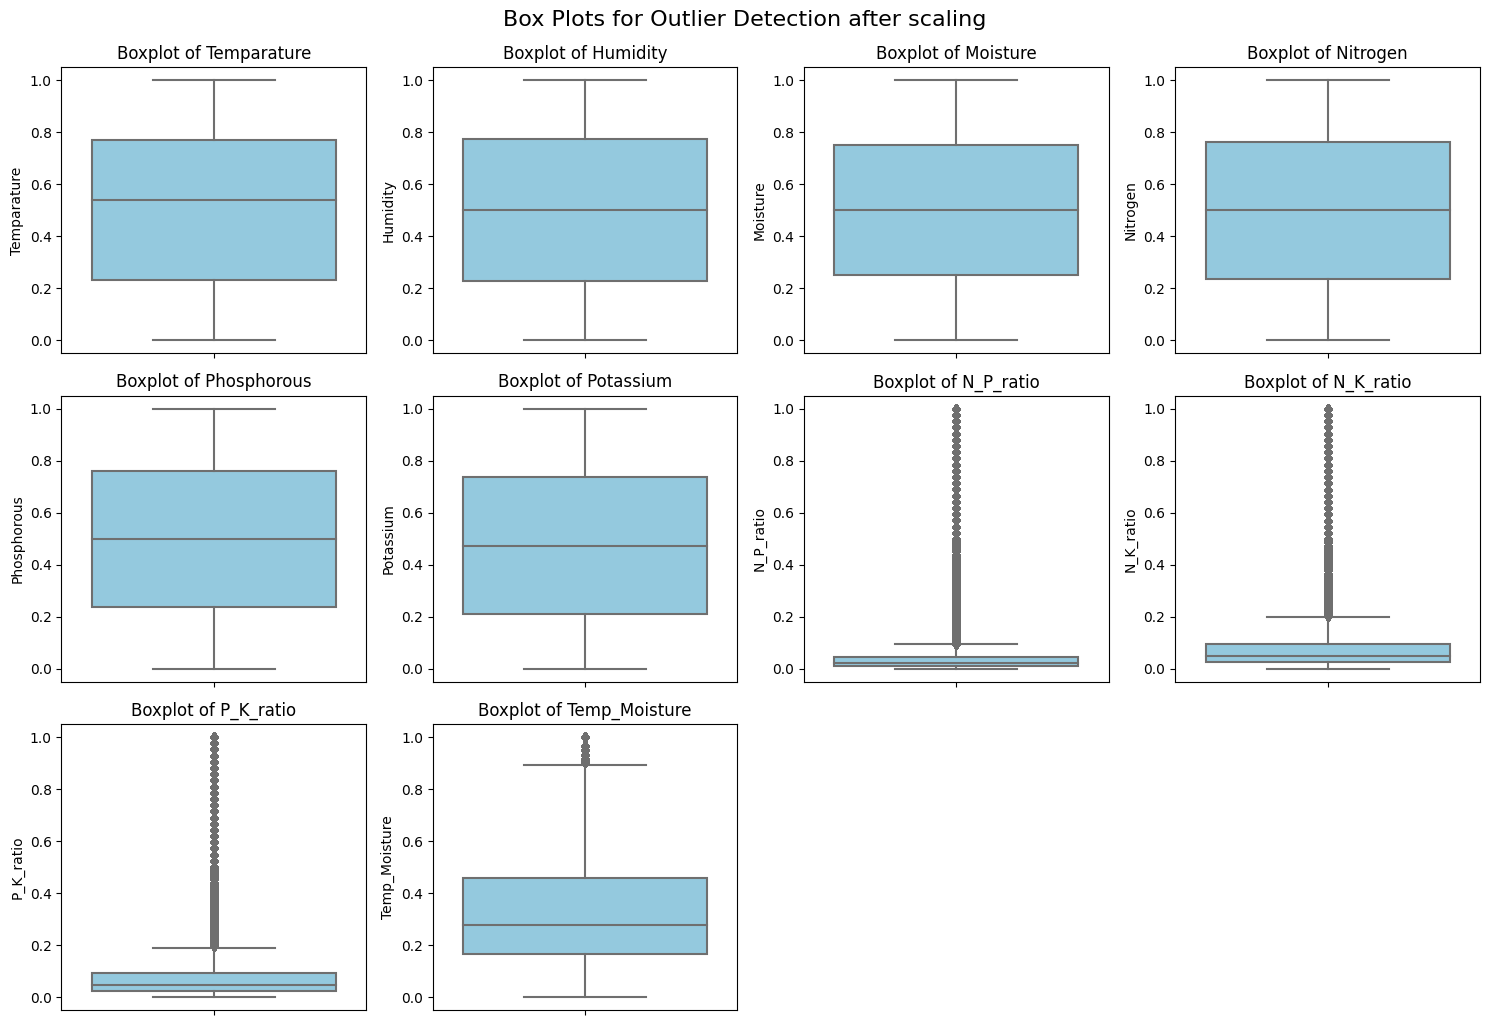

In [56]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=train_encoded[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle("Box Plots for Outlier Detection after scaling", fontsize=16, y=1.02)
plt.show()

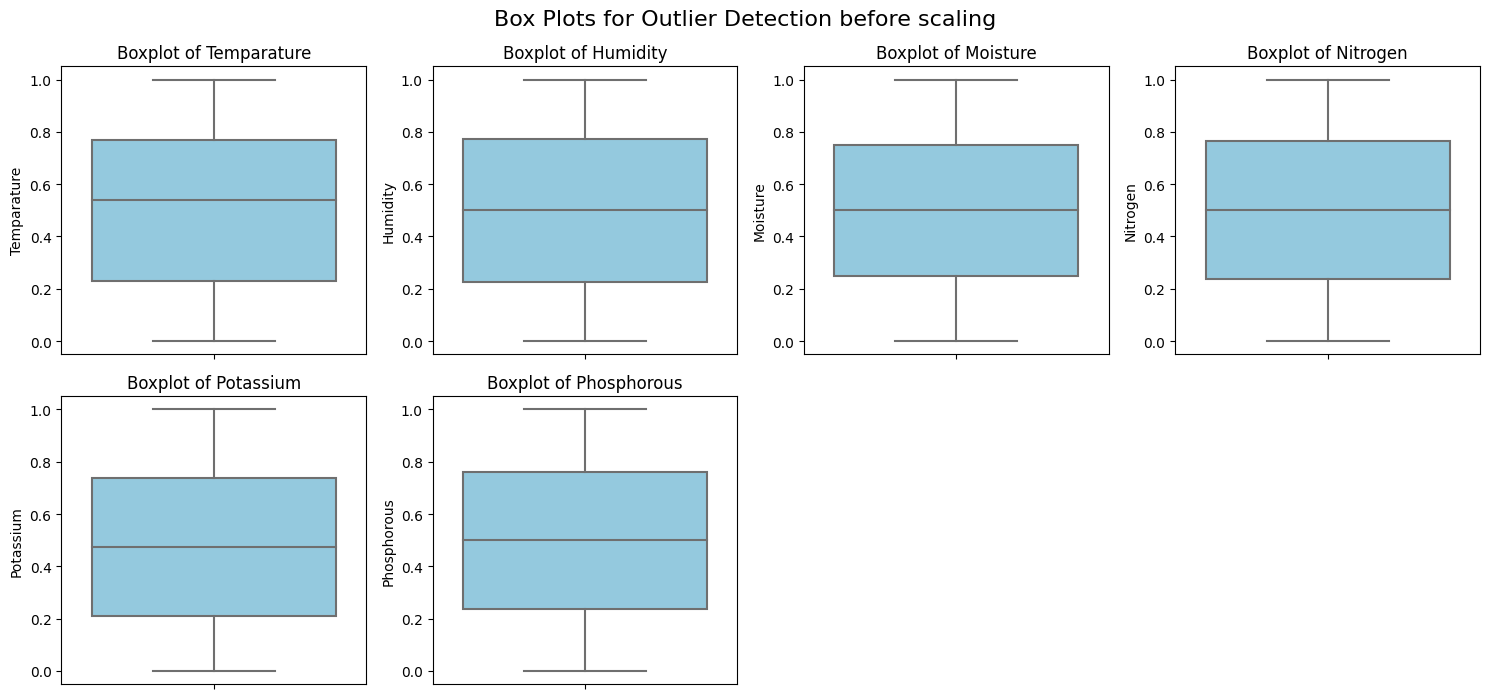

In [57]:
numeric_cols_train=['Temparature','Humidity','Moisture','Nitrogen','Potassium','Phosphorous']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols_train):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=train_encoded[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle("Box Plots for Outlier Detection before scaling", fontsize=16, y=1.02)
plt.show()

In [58]:
train_encoded.columns

Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Fertilizer Name', 'Soil Type_Black', 'Soil Type_Clayey',
       'Soil Type_Loamy', 'Soil Type_Red', 'Soil Type_Sandy',
       'Crop Type_Barley', 'Crop Type_Cotton', 'Crop Type_Ground Nuts',
       'Crop Type_Maize', 'Crop Type_Millets', 'Crop Type_Oil seeds',
       'Crop Type_Paddy', 'Crop Type_Pulses', 'Crop Type_Sugarcane',
       'Crop Type_Tobacco', 'Crop Type_Wheat', 'N_P_ratio', 'N_K_ratio',
       'P_K_ratio', 'Temp_Moisture'],
      dtype='object')

In [90]:
X=train_encoded.drop(columns=['Fertilizer Name','id'])
X.head(5)

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,N_P_ratio,N_K_ratio,P_K_ratio,Temp_Moisture
0,0.923077,0.909091,0.275,0.842105,0.210526,0.119048,False,True,False,False,...,False,False,False,True,False,False,0.140954,0.167464,0.023810,0.573735
1,0.153846,0.863636,1.000,0.684211,0.315789,0.428571,False,False,False,False,...,False,False,False,False,False,False,0.035458,0.097744,0.061224,0.027987
2,0.307692,0.590909,0.175,0.526316,0.631579,0.380952,False,False,False,False,...,False,False,False,False,False,False,0.031468,0.039382,0.029304,0.461787
3,0.769231,0.545455,0.725,0.921053,0.631579,0.095238,False,False,False,False,...,False,False,False,False,False,False,0.183907,0.066986,0.007326,0.237890
4,0.769231,0.363636,0.450,0.868421,0.105263,0.380952,False,False,False,True,...,False,True,False,False,False,False,0.049716,0.290271,0.126984,0.384822


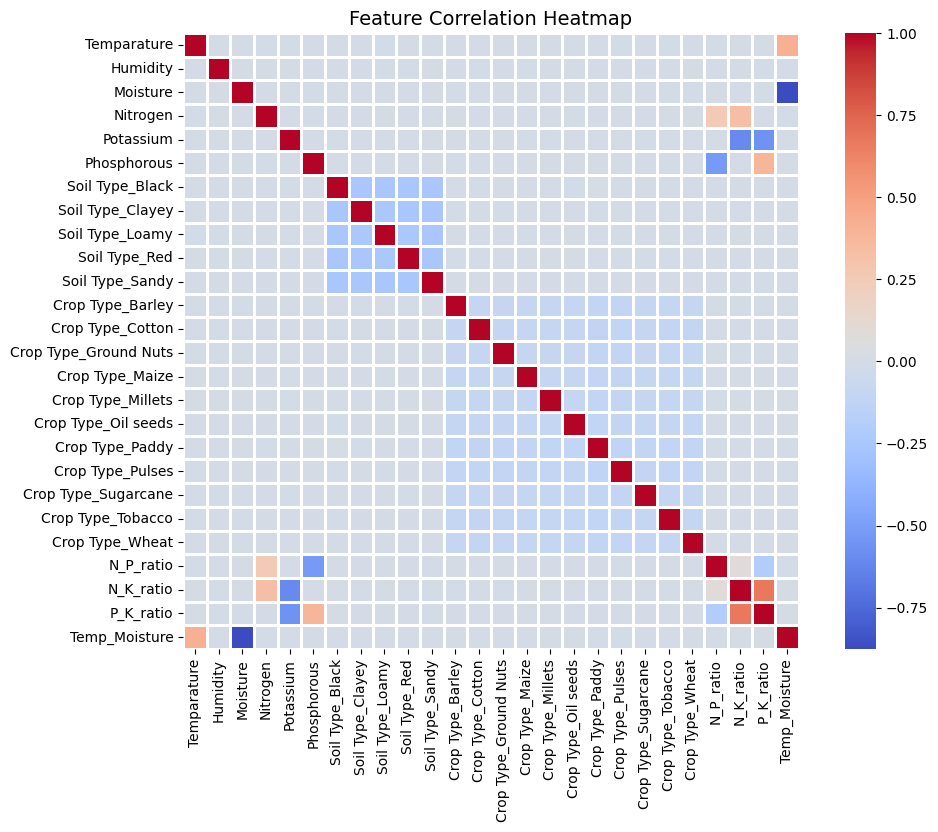

In [60]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(),            # show correlation values
            fmt=".2f",             # format values to 2 decimals
            cmap="coolwarm",       # diverging colormap: blue to red      # fix scale to full correlation range
            linewidths=1,        # borders between boxes
            square=True)           # square cells

plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

In [64]:
train_encoded.shape

(750000, 28)

In [65]:
train_encoded['Fertilizer Name'].value_counts()

Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64

In [66]:
y=train_encoded['Fertilizer Name']

In [67]:
y.head(5)

0       28-28
1       28-28
2    17-17-17
3    10-26-26
4         DAP
Name: Fertilizer Name, dtype: object

In [69]:
X = train_encoded.drop('Fertilizer Name', axis=1)

In [91]:
X.head(5)

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,N_P_ratio,N_K_ratio,P_K_ratio,Temp_Moisture
0,0.923077,0.909091,0.275,0.842105,0.210526,0.119048,False,True,False,False,...,False,False,False,True,False,False,0.140954,0.167464,0.023810,0.573735
1,0.153846,0.863636,1.000,0.684211,0.315789,0.428571,False,False,False,False,...,False,False,False,False,False,False,0.035458,0.097744,0.061224,0.027987
2,0.307692,0.590909,0.175,0.526316,0.631579,0.380952,False,False,False,False,...,False,False,False,False,False,False,0.031468,0.039382,0.029304,0.461787
3,0.769231,0.545455,0.725,0.921053,0.631579,0.095238,False,False,False,False,...,False,False,False,False,False,False,0.183907,0.066986,0.007326,0.237890
4,0.769231,0.363636,0.450,0.868421,0.105263,0.380952,False,False,False,True,...,False,True,False,False,False,False,0.049716,0.290271,0.126984,0.384822


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_int = pd.Series(le.fit_transform(y))

In [28]:
from tensorflow.keras.utils import to_categorical

y_onehot = to_categorical(y_int, num_classes=7)

2025-06-30 11:45:00.327453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751283900.546590      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751283900.604114      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [75]:
y_onehot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [29]:
!pip install tensorflow


📂 Fold 1


I0000 00:00:1751283921.354148      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/100


I0000 00:00:1751283924.505856     105 service.cc:148] XLA service 0x7cccf8007130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751283924.506391     105 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751283924.727481     105 cuda_dnn.cc:529] Loaded cuDNN version 90300


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1541 - loss: 2.4943
Epoch 2/100
 1/50 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3125 - loss: 1.7580

I0000 00:00:1751283926.153977     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2020 - loss: 2.0761
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2424 - loss: 1.9641
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2828 - loss: 1.8942
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2797 - loss: 1.8366
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3215 - loss: 1.7675
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3314 - loss: 1.7207
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3602 - loss: 1.6653
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3770 - loss: 1.6066
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4502 - loss: 1.4642
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4227 - loss: 1.5658
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4217 - loss: 1.4989
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4624 - l

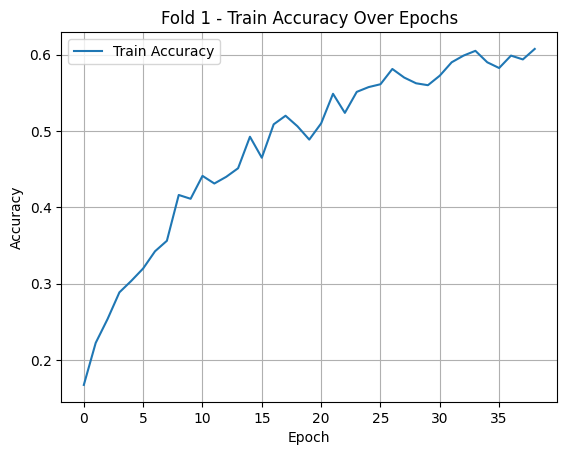


📂 Fold 2
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1356 - loss: 2.7687
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1897 - loss: 2.3202
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2360 - loss: 2.0750
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2585 - loss: 1.9274
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3091 - loss: 1.7906
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3548 - loss: 1.6715
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3614 - loss: 1.7155
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3751 - loss: 1.7046
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3868 - loss: 1.6186
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3995 - loss: 1.5074
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4243 - loss: 1.4942
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

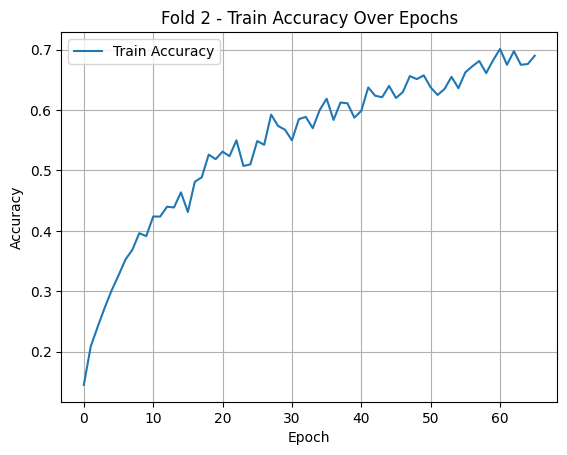


📂 Fold 3
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1880 - loss: 2.6648
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1894 - loss: 2.2218
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2214 - loss: 2.0153
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2307 - loss: 1.9642
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2835 - loss: 1.8329
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3192 - loss: 1.7913
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3460 - loss: 1.6826
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3195 - loss: 1.7522
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3810 - loss: 1.6318
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3958 - loss: 1.6183
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3858 - loss: 1.5701
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

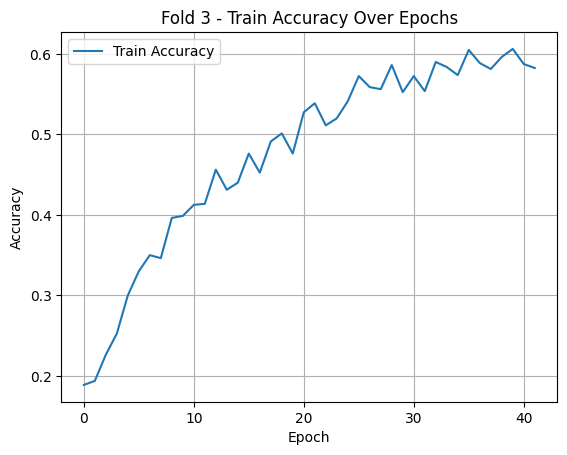


📂 Fold 4
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1570 - loss: 2.9243
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1658 - loss: 2.4514
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2129 - loss: 2.1309
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2524 - loss: 1.9694
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2913 - loss: 1.8382
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2712 - loss: 1.9002
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2879 - loss: 1.8176
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3651 - loss: 1.6743
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3587 - loss: 1.6816
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3837 - loss: 1.6675
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3767 - loss: 1.6191
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

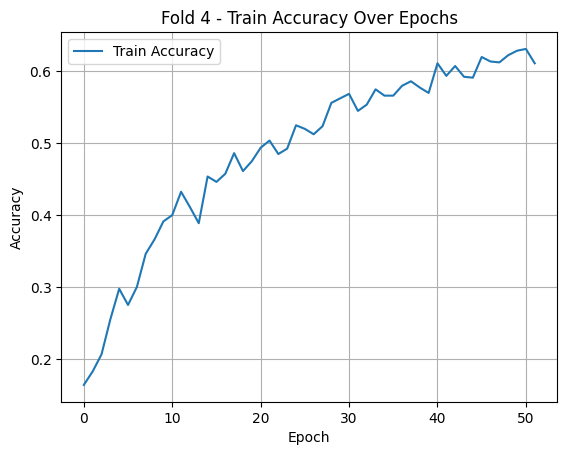


📂 Fold 5
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1493 - loss: 2.6969
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2020 - loss: 2.2969
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2401 - loss: 2.0847
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2777 - loss: 1.9237
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2900 - loss: 1.8678
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3495 - loss: 1.7785
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3067 - loss: 1.8028
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3814 - loss: 1.6979
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3922 - loss: 1.6261
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3868 - loss: 1.6001
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4080 - loss: 1.5866
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

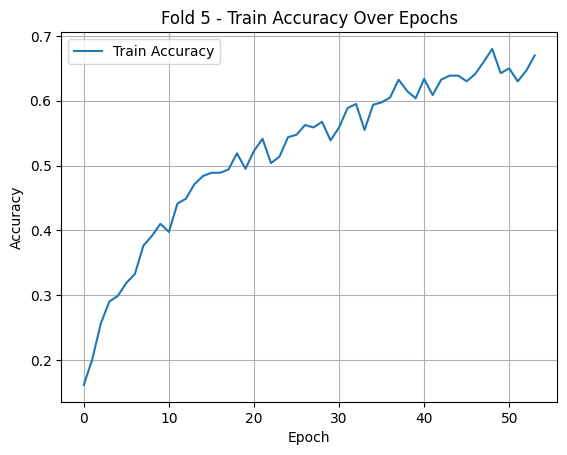


🎯 Mean Train Accuracy over 5 folds: 0.8288
📉 Train Std Deviation: 0.0000

🎯 Mean Test Accuracy over 5 folds: 0.6100
📉 Test Std Deviation: 0.0000
Fold 1 ➤ Train: 0.8288, Test: 0.6100, Gap: 0.2188


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# K-Fold Cross Validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_int), 1):
    print(f"\n📂 Fold {fold}")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_int[train_idx], y_int[test_idx]

    model = Sequential([
        Input(shape=(X.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(7, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    early_stop = EarlyStopping(
        monitor='loss',
        patience=5,
        restore_best_weights=True
    )

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=16,
        verbose=1,
        callbacks=[early_stop]
    )

    # Evaluate both train and test accuracy
    train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    print(f"🧠 Fold {fold} — Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")
    accuracies.append(test_acc)
    train_accuracies = []
    test_accuracies = []

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)



    # Plot training accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.title(f'Fold {fold} - Train Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

# Summary
print(f"\n🎯 Mean Train Accuracy over {k} folds: {np.mean(train_accuracies):.4f}")
print(f"📉 Train Std Deviation: {np.std(train_accuracies):.4f}")

print(f"\n🎯 Mean Test Accuracy over {k} folds: {np.mean(test_accuracies):.4f}")
print(f"📉 Test Std Deviation: {np.std(test_accuracies):.4f}")

# Per-fold gaps
for i, (train, test) in enumerate(zip(train_accuracies, test_accuracies), 1):
    gap = train - test
    print(f"Fold {i} ➤ Train: {train:.4f}, Test: {test:.4f}, Gap: {gap:.4f}")

ℹ️ No validation accuracy available — did you set validation_split?


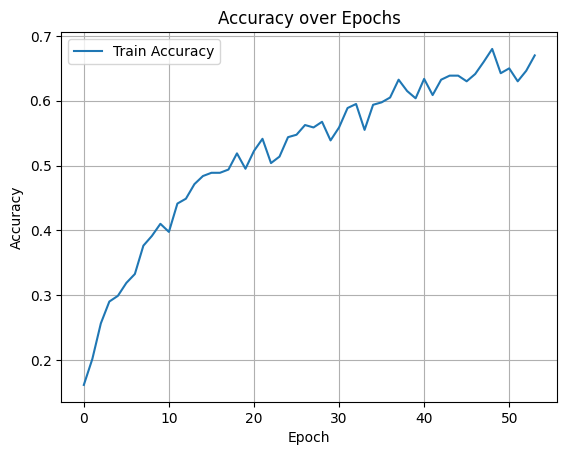

ℹ️ No validation loss available — did you set validation_split?


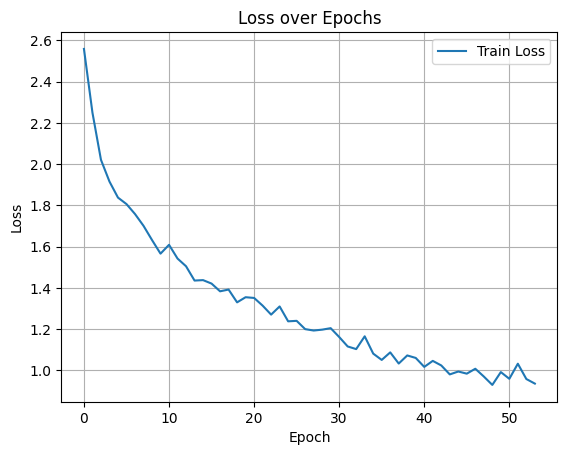

In [31]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
else:
    print("ℹ️ No validation accuracy available — did you set validation_split?")
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Val Loss')
else:
    print("ℹ️ No validation loss available — did you set validation_split?")
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [72]:
# ✅ STEP 1: Install CatBoost (only required in Kaggle/local env)
!pip install -q catboost

In [73]:
X.head(5)

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,...,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,N_P_ratio,N_K_ratio,P_K_ratio,Temp_Moisture
0,0,0.923077,0.909091,0.275,0.842105,0.210526,0.119048,False,True,False,...,False,False,False,True,False,False,0.140954,0.167464,0.023810,0.573735
1,1,0.153846,0.863636,1.000,0.684211,0.315789,0.428571,False,False,False,...,False,False,False,False,False,False,0.035458,0.097744,0.061224,0.027987
2,2,0.307692,0.590909,0.175,0.526316,0.631579,0.380952,False,False,False,...,False,False,False,False,False,False,0.031468,0.039382,0.029304,0.461787
3,3,0.769231,0.545455,0.725,0.921053,0.631579,0.095238,False,False,False,...,False,False,False,False,False,False,0.183907,0.066986,0.007326,0.237890
4,4,0.769231,0.363636,0.450,0.868421,0.105263,0.380952,False,False,False,...,False,True,False,False,False,False,0.049716,0.290271,0.126984,0.384822


In [82]:
y.head(5)

0       28-28
1       28-28
2    17-17-17
3    10-26-26
4         DAP
Name: Fertilizer Name, dtype: object

In [83]:
y_int.head(5)

0    4
1    4
2    2
3    0
4    5
dtype: int64

In [84]:
print(pd.Series(y_int).value_counts(normalize=True))

1    0.152581
0    0.151849
2    0.149937
4    0.148211
3    0.147852
5    0.126480
6    0.123089
Name: proportion, dtype: float64


In [85]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X, y_int)
print(f"🧪 Dummy Accuracy (baseline): {dummy.score(X, y_int):.4f}")


🧪 Dummy Accuracy (baseline): 0.1526


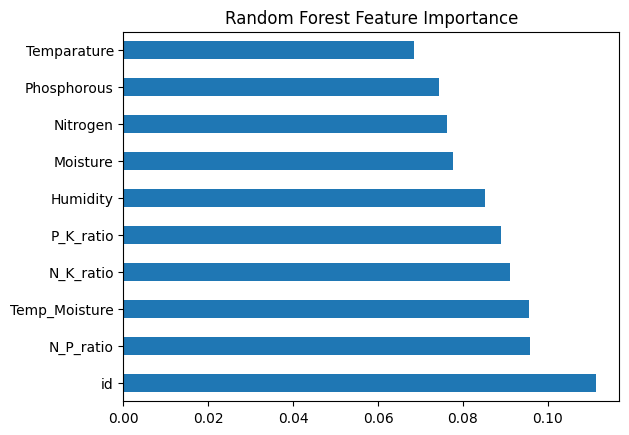

In [86]:
import matplotlib.pyplot as plt

rf.fit(X, y_int)
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()


In [87]:

# ✅ STEP 2: Imports
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


# ✅ STEP 4: K-Fold Setup
k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ✅ STEP 5: Accuracy storage
results = {
    'RandomForest': [],
    'XGBoost': [],
    'CatBoost': []
}
le = LabelEncoder()
y_int = pd.Series(le.fit_transform(y))

# ✅ STEP 6: Train each model per fold
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_int), 1):
    print(f"\n📂 Fold {fold}")
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_int.iloc[train_idx], y_int.iloc[test_idx]
    
    # 🌲 Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"🌲 Random Forest Accuracy: {rf_acc:.4f}")
    results['RandomForest'].append(rf_acc)
    
    # ⚡ XGBoost
    xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    xgb.fit(X_train, y_train)
    xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
    print(f"⚡ XGBoost Accuracy: {xgb_acc:.4f}")
    results['XGBoost'].append(xgb_acc)
    
    # 🐱 CatBoost
    cat = CatBoostClassifier(iterations=100, verbose=0, random_state=42)
    cat.fit(X_train, y_train)
    cat_acc = accuracy_score(y_test, cat.predict(X_test))
    print(f"🐱 CatBoost Accuracy: {cat_acc:.4f}")
    results['CatBoost'].append(cat_acc)

# ✅ STEP 7: Summary Report
print("\n📊 Final Results:")
for model, scores in results.items():
    print(f"{model}: Mean Acc = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")



📂 Fold 1
🌲 Random Forest Accuracy: 0.1646
⚡ XGBoost Accuracy: 0.1887
🐱 CatBoost Accuracy: 0.1801

📂 Fold 2
🌲 Random Forest Accuracy: 0.1661
⚡ XGBoost Accuracy: 0.1905
🐱 CatBoost Accuracy: 0.1802

📂 Fold 3
🌲 Random Forest Accuracy: 0.1650
⚡ XGBoost Accuracy: 0.1910
🐱 CatBoost Accuracy: 0.1810

📂 Fold 4
🌲 Random Forest Accuracy: 0.1656
⚡ XGBoost Accuracy: 0.1903
🐱 CatBoost Accuracy: 0.1798

📂 Fold 5
🌲 Random Forest Accuracy: 0.1641
⚡ XGBoost Accuracy: 0.1897
🐱 CatBoost Accuracy: 0.1787

📊 Final Results:
RandomForest: Mean Acc = 0.1651, Std Dev = 0.0007
XGBoost: Mean Acc = 0.1901, Std Dev = 0.0008
CatBoost: Mean Acc = 0.1800, Std Dev = 0.0007
